<a href="https://colab.research.google.com/github/UOH-Group3-Project/Hackathon_group3/blob/main/G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # Import SimpleImputer
import missingno as msno

In [44]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,4)

In [45]:
from google. colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
path = '/content/drive/MyDrive/dataset_A_training.csv'
df = pd.read_csv(path)

In [47]:
print("\nDataset Loaded Successfully!")
print("\n Shape of dataset:", df.shape)
print("\n Columns:\n", df.columns.tolist())
print("\n Data Types:\n", df.dtypes)
print("\n Missing Values:\n", df.isnull().sum())
print("\n Descriptive Statistics:\n", df.describe())


Dataset Loaded Successfully!

 Shape of dataset: (4756, 31)

 Columns:
 ['respondent_id', 'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'household_adults', 'household_children', 'employment_sector', 'seasonal_vaccine']

 Data Types:
 respondent_id                    int64
flu_concern                    float64
flu_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
b

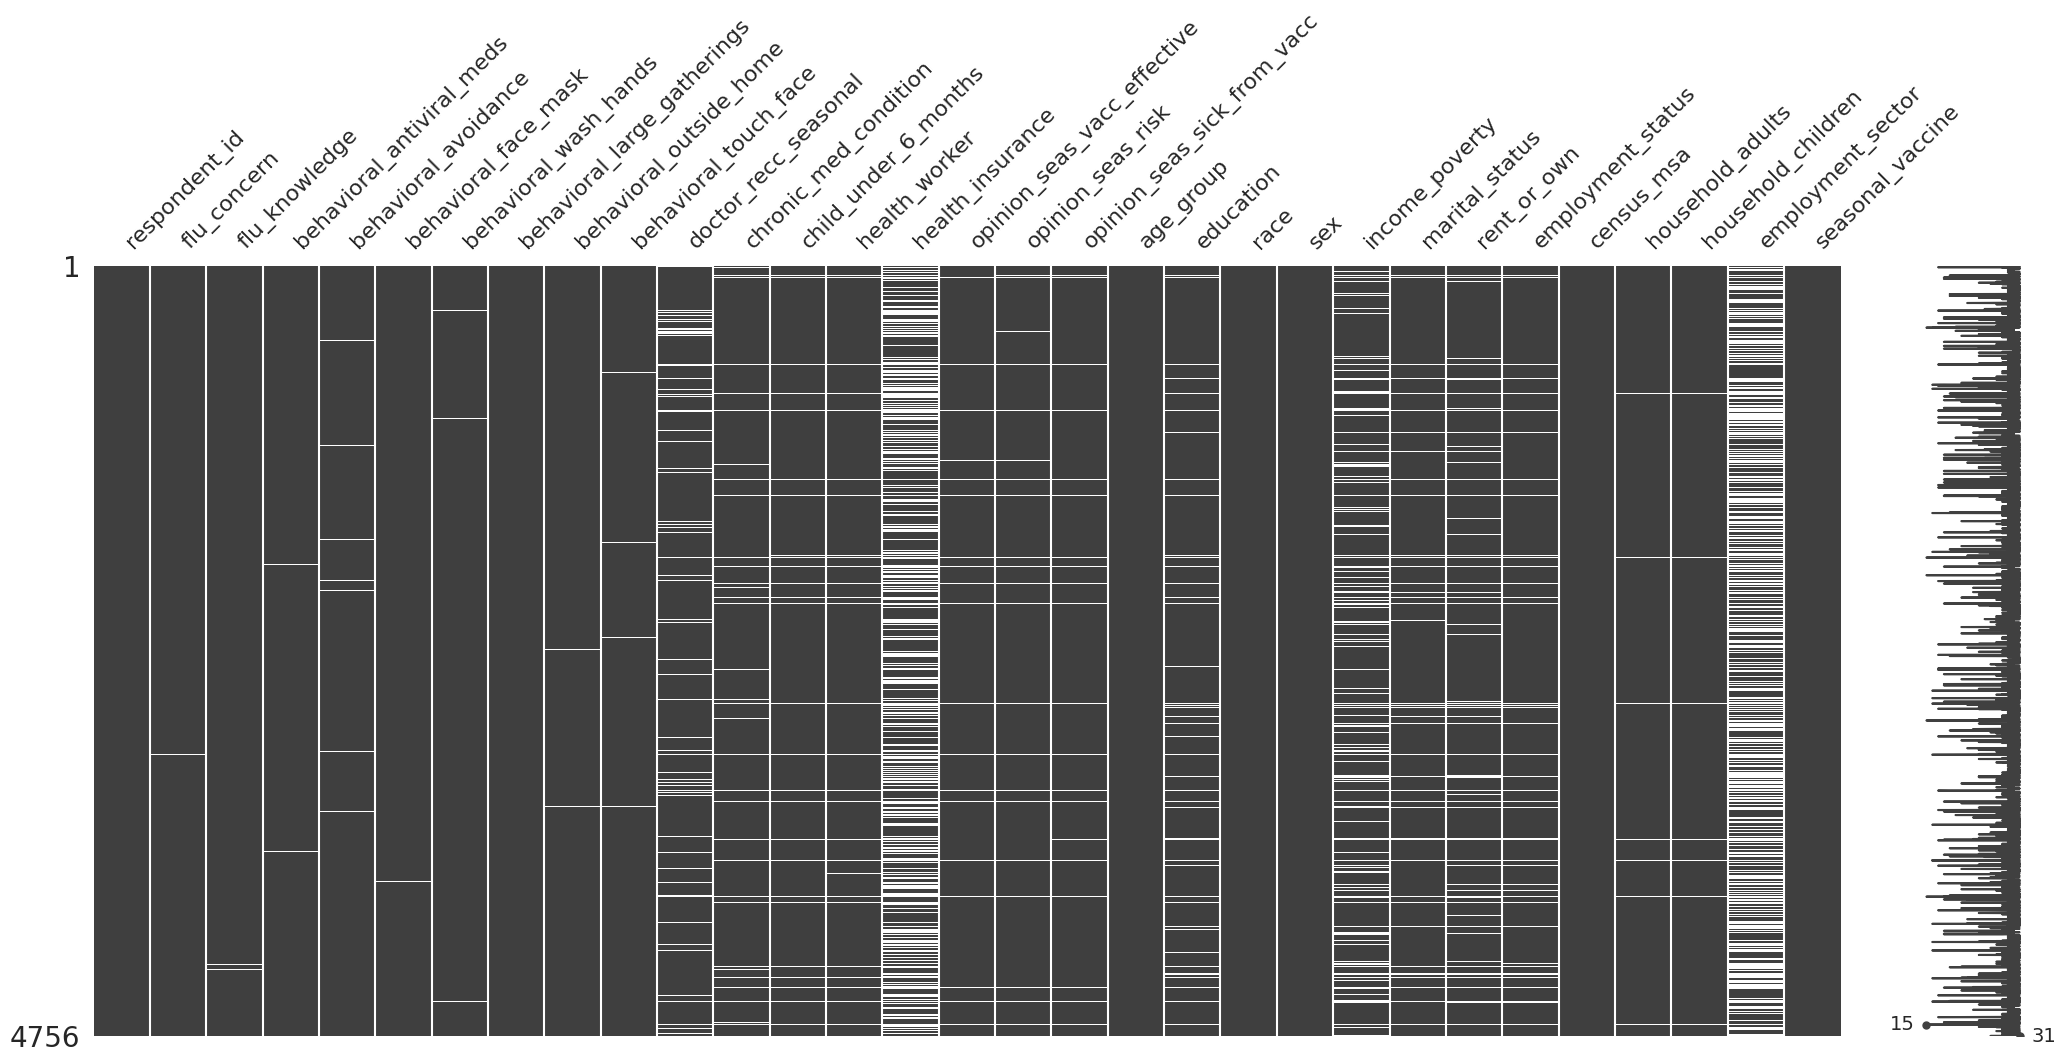

In [48]:
msno.matrix(df)
plt.show()

In [49]:
print(f"Duplicates found: {df.duplicated().sum()}")


Duplicates found: 0


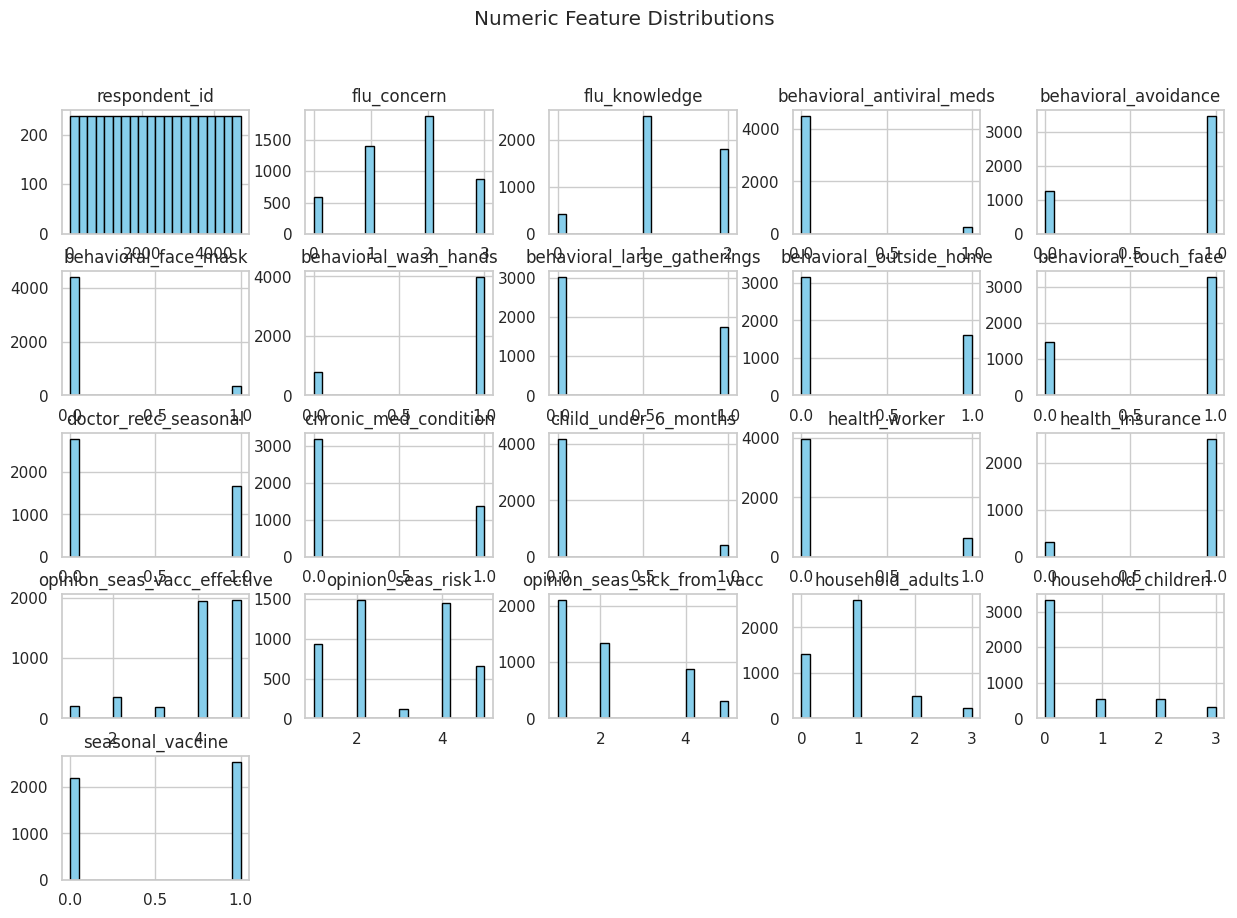

In [50]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions")
plt.show()

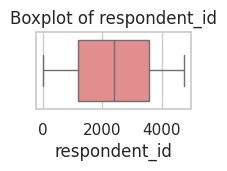

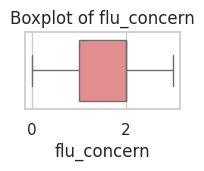

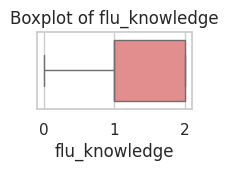

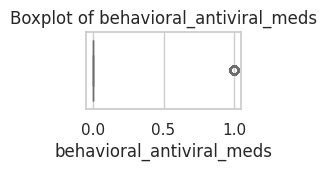

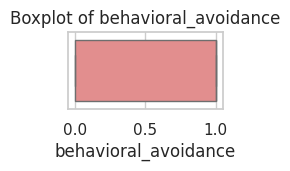

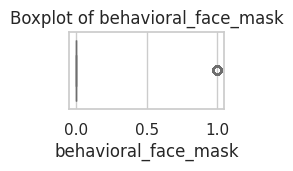

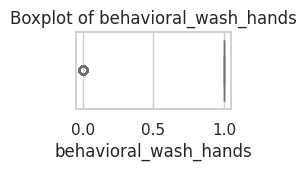

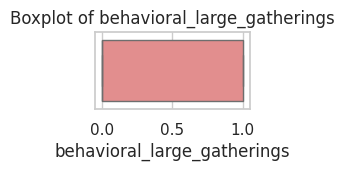

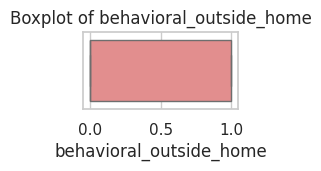

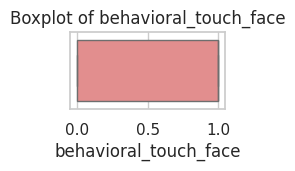

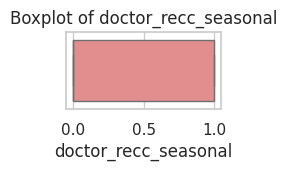

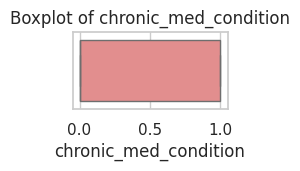

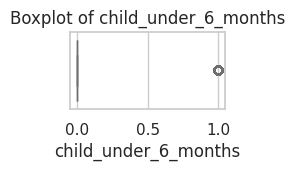

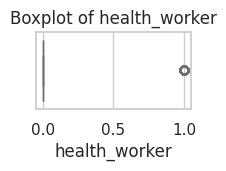

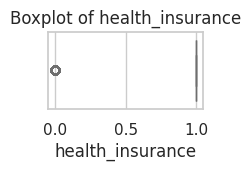

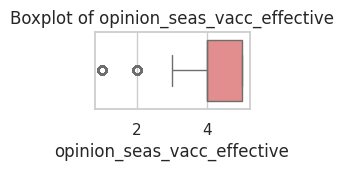

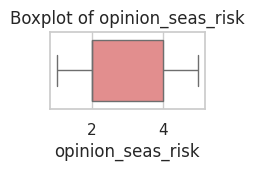

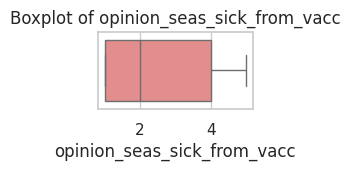

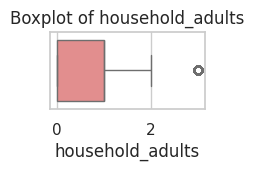

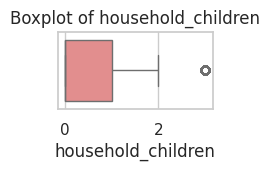

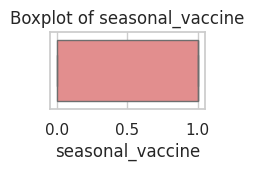

In [51]:
for col in numeric_cols:
    plt.figure(figsize=(2, 1),)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()

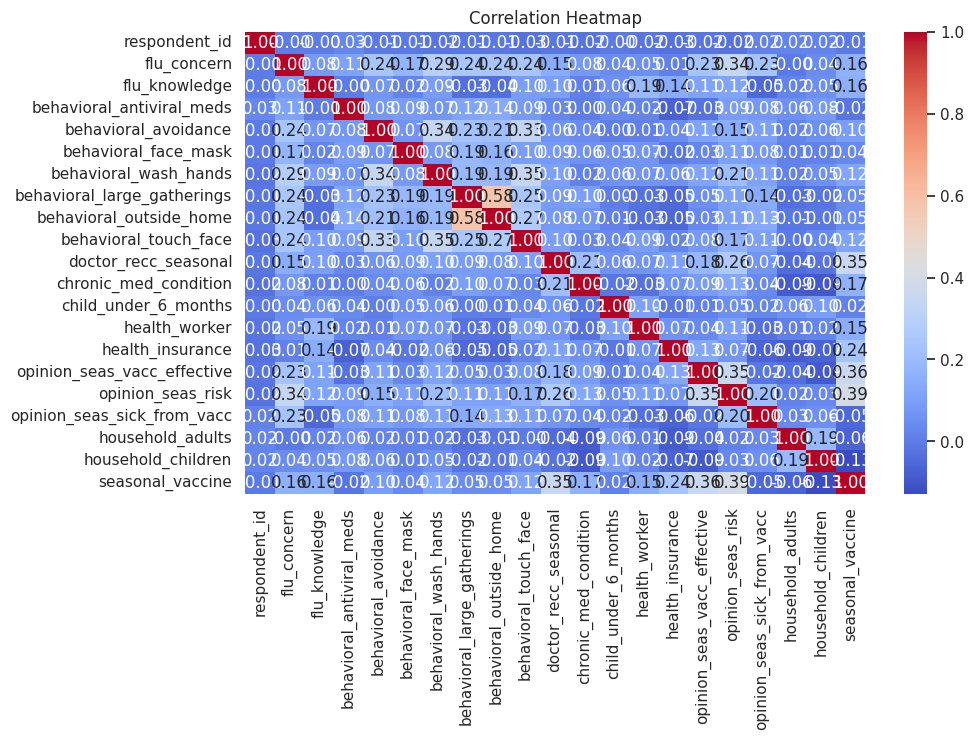

In [52]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


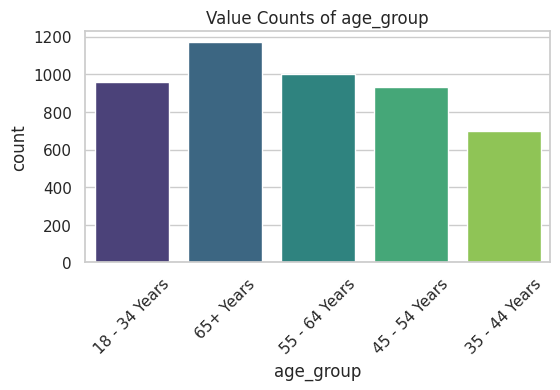

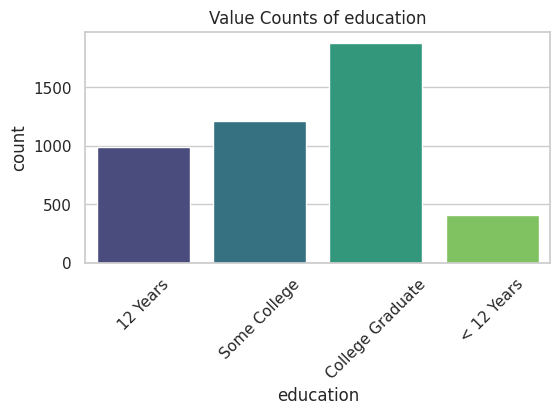

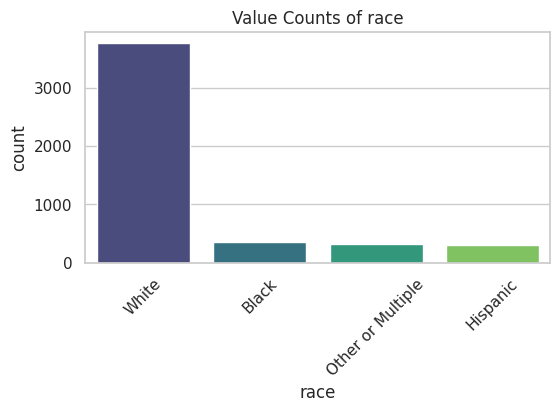

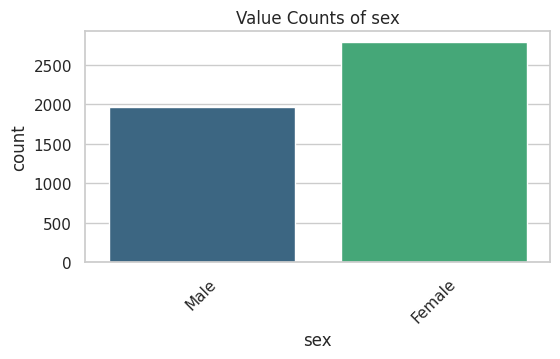

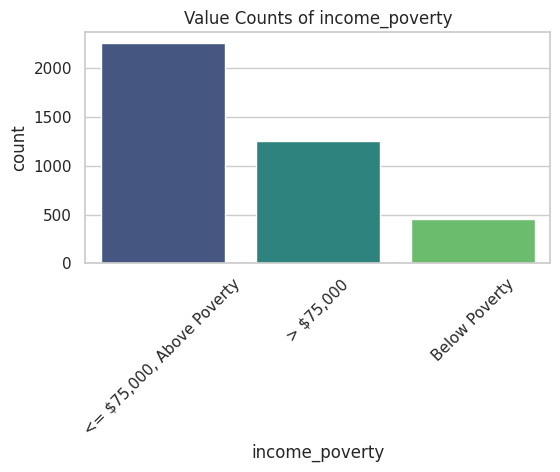

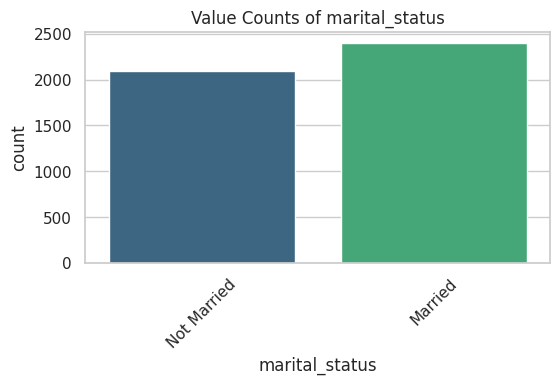

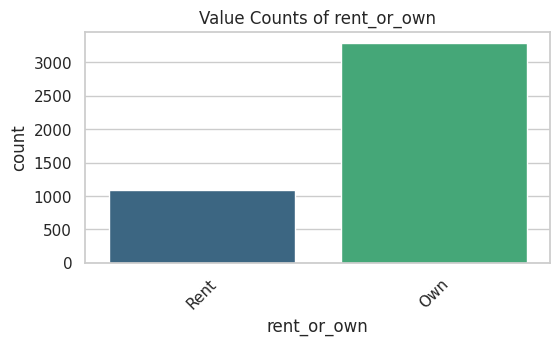

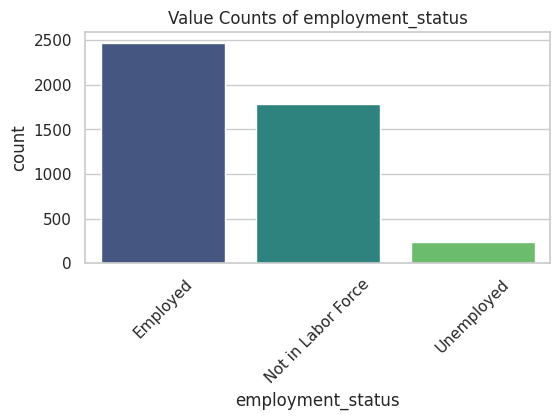

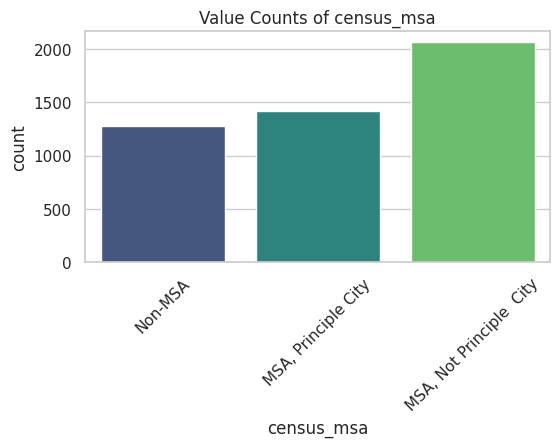

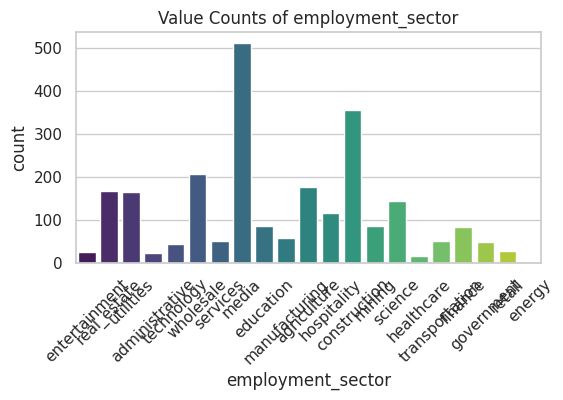

In [53]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Value Counts of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [54]:
for col in numeric_cols:
    skew_val = df[col].skew()
    print(f"Skewness of {col}: {skew_val:.2f}")
    if abs(skew_val) > 1:
        print(f" {col} is highly skewed. Consider log or sqrt transformation.\n")


Skewness of respondent_id: 0.00
Skewness of flu_concern: -0.19
Skewness of flu_knowledge: -0.29
Skewness of behavioral_antiviral_meds: 4.02
 behavioral_antiviral_meds is highly skewed. Consider log or sqrt transformation.

Skewness of behavioral_avoidance: -1.06
 behavioral_avoidance is highly skewed. Consider log or sqrt transformation.

Skewness of behavioral_face_mask: 3.26
 behavioral_face_mask is highly skewed. Consider log or sqrt transformation.

Skewness of behavioral_wash_hands: -1.82
 behavioral_wash_hands is highly skewed. Consider log or sqrt transformation.

Skewness of behavioral_large_gatherings: 0.56
Skewness of behavioral_outside_home: 0.69
Skewness of behavioral_touch_face: -0.81
Skewness of doctor_recc_seasonal: 0.52
Skewness of chronic_med_condition: 0.86
Skewness of child_under_6_months: 2.84
 child_under_6_months is highly skewed. Consider log or sqrt transformation.

Skewness of health_worker: 2.11
 health_worker is highly skewed. Consider log or sqrt transformat

In [55]:
print("\n EDA Completed Successfully!")
print(f" Total Rows: {df.shape[0]} | Columns: {df.shape[1]}")
print(f" Numeric Columns: {len(numeric_cols)} | Categorical Columns: {len(cat_cols)}")
print(" Missing Values:", df.isnull().sum().sum())


 EDA Completed Successfully!
 Total Rows: 4756 | Columns: 31
 Numeric Columns: 21 | Categorical Columns: 10
 Missing Values: 7538


In [56]:
# spliting by type
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns
print(f"Numeric columns: {len(num_cols)} | Categorical columns: {len(cat_cols)}\n")

Numeric columns: 21 | Categorical columns: 10



In [58]:
print(" Handling Missing Values...")
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
print("Missing values handled.\n")

 Handling Missing Values...
Missing values handled.



In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [61]:
print("Handling Missing Values...")
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Numeric missing values --> mean imputation
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical missing values --> mode imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
print("Missing values handled.\n")

Handling Missing Values...
Missing values handled.



In [62]:
print("Encoding categorical variables...")
encoded_df = df.copy()

# Label Encode small categorical columns (<=10 unique values)
label_encoder = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() <= 10:
        encoded_df[col] = label_encoder.fit_transform(df[col])
    else:
        # One-hot encode larger categorical features
        encoded_df = pd.get_dummies(encoded_df, columns=[col], drop_first=True)

print("Encoding complete.\n")

Encoding categorical variables...
Encoding complete.



In [64]:
print("Feature Scaling (StandardScaler)...")
scaler = StandardScaler()
encoded_df[num_cols] = scaler.fit_transform(encoded_df[num_cols])
print("Scaling complete.\n")

Feature Scaling (StandardScaler)...
Scaling complete.



In [65]:
for col in num_cols:
    if 'age' in col.lower():
        encoded_df[col + '_bin'] = pd.cut(df[col],
                                          bins=[0,20,40,60,80,100],
                                          labels=['Teen','Young','Adult','Mature','Senior'])
        print(f" Binned feature created: {col}_bin")
print("\n Optional binning done (if applicable).\n")


 Optional binning done (if applicable).



In [66]:
print(" Final Preprocessed Dataset Info:")
print(encoded_df.info())
print("\n Shape:", encoded_df.shape)
print("First few rows:")
display(encoded_df.head())

 Final Preprocessed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   respondent_id                     4756 non-null   float64
 1   flu_concern                       4756 non-null   float64
 2   flu_knowledge                     4756 non-null   float64
 3   behavioral_antiviral_meds         4756 non-null   float64
 4   behavioral_avoidance              4756 non-null   float64
 5   behavioral_face_mask              4756 non-null   float64
 6   behavioral_wash_hands             4756 non-null   float64
 7   behavioral_large_gatherings       4756 non-null   float64
 8   behavioral_outside_home           4756 non-null   float64
 9   behavioral_touch_face             4756 non-null   float64
 10  doctor_recc_seasonal              4756 non-null   float64
 11  chronic_med_condition             4

,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_sector_media,employment_sector_mining,employment_sector_real_estate,employment_sector_retail,employment_sector_science,employment_sector_services,employment_sector_technology,employment_sector_transportation,employment_sector_utilities,employment_sector_wholesale
0,-1.731687,0.388516,-2.094556,-0.235261,0.603839,-0.282466,0.442376,1.318831,-0.713039,-1.489366,...,False,False,False,False,False,False,False,False,False,False
1,-1.730958,-0.700154,-0.474697,-0.235261,0.603839,-0.282466,-2.264328,-0.759685,-0.713039,-1.489366,...,False,False,True,False,False,False,False,False,False,False
2,-1.730230,0.388516,-0.474697,-0.235261,0.603839,-0.282466,0.442376,1.318831,1.405107,-1.489366,...,True,False,False,False,False,False,False,False,False,False
3,-1.729502,-0.700154,1.145161,-0.235261,0.603839,-0.282466,0.442376,-0.759685,-0.713039,0.674120,...,False,False,False,False,False,False,False,False,True,False
4,-1.728773,0.388516,1.145161,-0.235261,0.603839,-0.282466,0.442376,1.318831,1.405107,0.674120,...,True,False,False,False,False,False,False,False,False,False


In [67]:
encoded_df.to_csv('/content/drive/MyDrive/cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved to Google Drive as 'cleaned_dataset.csv'")
print("Data Pre-processing Completed Successfully!")



Cleaned dataset saved to Google Drive as 'cleaned_dataset.csv'
Data Pre-processing Completed Successfully!


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [73]:
# Safe target handling
df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')
df.columns = df.columns.str.strip()

In [77]:
# Replace with your actual target column
TARGET = 'seasonal_vaccine'

X = df.drop(columns=[TARGET])
y = df[TARGET]

In [79]:
# Now continue with train-test split and model building...
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target variable to integer type
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

In [80]:
# Compare models
result_df = pd.DataFrame(list(results.items()), columns=['Model','Accuracy']).sort_values(by='Accuracy', ascending=False)
print(result_df)

                    Model  Accuracy
4       Gradient Boosting  0.771008
2           Random Forest  0.760504
0     Logistic Regression  0.757353
3  Support Vector Machine  0.755252
1           Decision Tree  0.657563


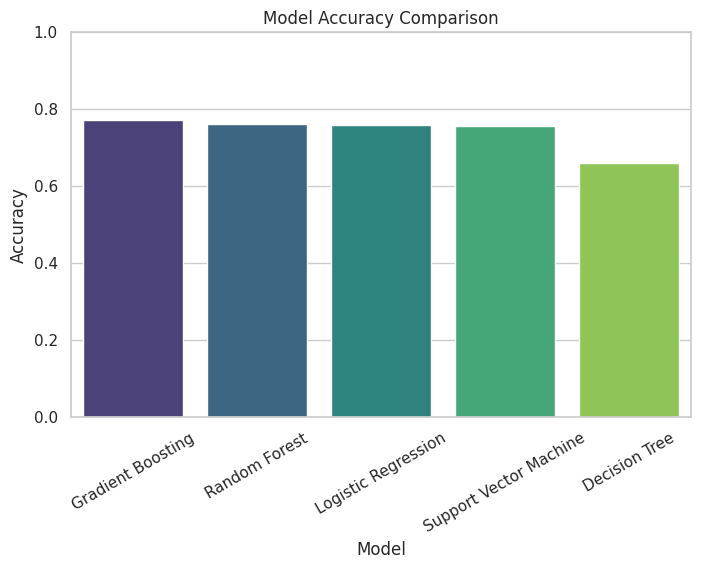

In [81]:
# Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(data=result_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()